# 1. Create a .CSV file

import basic library to create table 

In [1]:
# import pandas library
import pandas as pd
# import numpy library
import numpy as np


I will define each row data. Then I will create a dataframe and set two levels index name and columns name, which includes a row in the middle with nan index and nan data

In [2]:
data = [[497, 221, 212, 503, 1841], [62, 12, 20, 102, 305],[np.nan,np.nan,np.nan,np.nan,np.nan], [694, 4840, 383, 320, 201],[117, 415, 65, 129, 61]]
# create a data frame with defined data
df = pd.DataFrame(np.array(data),
                     index=[['ALASKA', 'ALASKA', np.nan,'AM WEST', 'AM WEST'], ['on time', 'delayed', np.nan,'on time', 'delayed']], # set two levels index
                     columns=['Los Angeles', 'Phoenix', 'San Diego', 'San Francisco', 'Seattle'])

df.head()

Los Angeles  Phoenix  San Diego  San Francisco  Seattle
ALASKA  on time        497.0    221.0      212.0          503.0   1841.0
        delayed         62.0     12.0       20.0          102.0    305.0
NaN     NaN              NaN      NaN        NaN            NaN      NaN
AM WEST on time        694.0   4840.0      383.0          320.0    201.0
        delayed        117.0    415.0       65.0          129.0     61.0

write a csv file to local path

In [3]:
df.to_csv(r'C:\AI program\1stSemester\(1)Data aquisition& Management\tenth week\Messy.csv')

The csv file output is shown below

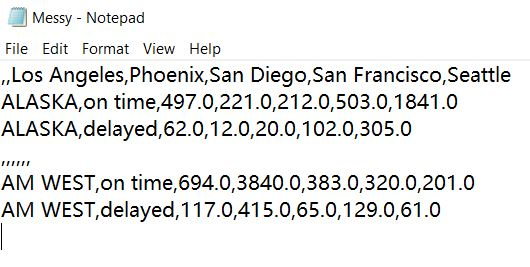

In [4]:
# show result on the local path
from IPython.display import Image
Image(filename=r'C:\AI program\1stSemester\(1)Data aquisition& Management\tenth week\MessyCSV_Result.jpg')

# 2. Transform messy data to tidy data(long format)

In [5]:
# read csv from github, set index column 0 and 1
df_messy = pd.read_csv('https://raw.githubusercontent.com/xiaolancara/AIM-5001/master/data/Messy.csv',index_col=[0,1])
df_messy.head()

Los Angeles  Phoenix  San Diego  San Francisco  Seattle
ALASKA  on time        497.0    221.0      212.0          503.0   1841.0
        delayed         62.0     12.0       20.0          102.0    305.0
NaN     NaN              NaN      NaN        NaN            NaN      NaN
AM WEST on time        694.0   4840.0      383.0          320.0    201.0
        delayed        117.0    415.0       65.0          129.0     61.0

In order to tranform the messy data to tidy data. The table should only contains one observation for a row and only one variable in one column.

To do the further transform, I will drop all nan rows first

In [6]:
# drop nan rows
df_messy = df_messy.dropna()
df_messy

Los Angeles  Phoenix  San Diego  San Francisco  Seattle
ALASKA  on time        497.0    221.0      212.0          503.0   1841.0
        delayed         62.0     12.0       20.0          102.0    305.0
AM WEST on time        694.0   4840.0      383.0          320.0    201.0
        delayed        117.0    415.0       65.0          129.0     61.0

Next, I will set names for two levels index as 'airline','time'

In [7]:
df_messy.index = df_messy.index.set_names(['airline','time'])
df_messy

Los Angeles  Phoenix  San Diego  San Francisco  Seattle
airline time                                                            
ALASKA  on time        497.0    221.0      212.0          503.0   1841.0
        delayed         62.0     12.0       20.0          102.0    305.0
AM WEST on time        694.0   4840.0      383.0          320.0    201.0
        delayed        117.0    415.0       65.0          129.0     61.0

I will stack the city(dataframe) since there are multiple observations for each row.

Before I stack the city, I should rename a axis, column name is 'city'

In [8]:
df_messy = df_messy.rename_axis(['city'], axis=1)
df_messy

city             Los Angeles  Phoenix  San Diego  San Francisco  Seattle
airline time                                                            
ALASKA  on time        497.0    221.0      212.0          503.0   1841.0
        delayed         62.0     12.0       20.0          102.0    305.0
AM WEST on time        694.0   4840.0      383.0          320.0    201.0
        delayed        117.0    415.0       65.0          129.0     61.0

Then I stack the city(defalt is all columns).

In [9]:
df_messy = df_messy.stack()
df_messy

airline  time     city         
ALASKA   on time  Los Angeles       497.0
                  Phoenix           221.0
                  San Diego         212.0
                  San Francisco     503.0
                  Seattle          1841.0
         delayed  Los Angeles        62.0
                  Phoenix            12.0
                  San Diego          20.0
                  San Francisco     102.0
                  Seattle           305.0
AM WEST  on time  Los Angeles       694.0
                  Phoenix          4840.0
                  San Diego         383.0
                  San Francisco     320.0
                  Seattle           201.0
         delayed  Los Angeles       117.0
                  Phoenix           415.0
                  San Diego          65.0
                  San Francisco     129.0
                  Seattle            61.0
dtype: float64

Then I will unstack the index 'time' to column since there are two variables in time column

In [10]:
df_messy = df_messy.unstack('time')
df_messy

time                   delayed  on time
airline city                           
ALASKA  Los Angeles       62.0    497.0
        Phoenix           12.0    221.0
        San Diego         20.0    212.0
        San Francisco    102.0    503.0
        Seattle          305.0   1841.0
AM WEST Los Angeles      117.0    694.0
        Phoenix          415.0   4840.0
        San Diego         65.0    383.0
        San Francisco    129.0    320.0
        Seattle           61.0    201.0

Finally, I will reset the index. Then I can get a long format tidy data

In [11]:
df_tidy = df_messy.reset_index()
df_tidy

time,airline,city,delayed,on time
0,ALASKA,Los Angeles,62.0,497.0
1,ALASKA,Phoenix,12.0,221.0
2,ALASKA,San Diego,20.0,212.0
3,ALASKA,San Francisco,102.0,503.0
4,ALASKA,Seattle,305.0,1841.0
5,AM WEST,Los Angeles,117.0,694.0
6,AM WEST,Phoenix,415.0,4840.0
7,AM WEST,San Diego,65.0,383.0
8,AM WEST,San Francisco,129.0,320.0
9,AM WEST,Seattle,61.0,201.0


In [12]:
#method 2
# df_tidy = df_messy.melt(id_vars=['airline','time'],var_name='city').set_index(['airline','city','time']).squeeze().unstack().reset_index()
# df_tidy

# 3.1  For each city, airline had the best on time performance.

In order to observe every on time values for each city, I will pivot city as index, columns as airline, values as on time

In [13]:
df_ontime = df_tidy.pivot(index='city', columns='airline', values='on time')
df_ontime

airline,ALASKA,AM WEST
city,,
Los Angeles,497.0,694.0
Phoenix,221.0,4840.0
San Diego,212.0,383.0
San Francisco,503.0,320.0
Seattle,1841.0,201.0


Then I will use numpy where function to compare two aurlines and insert a new column as result

In [14]:
comparison_column = np.where(df_ontime['ALASKA'] >= df_ontime['AM WEST'], 'ALASKA', 'AM WEST')
df_ontime["best_ontimeAirline"] = comparison_column
df_ontime

airline,ALASKA,AM WEST,best_ontimeAirline
city,,,
Los Angeles,497.0,694.0,AM WEST
Phoenix,221.0,4840.0,AM WEST
San Diego,212.0,383.0,AM WEST
San Francisco,503.0,320.0,ALASKA
Seattle,1841.0,201.0,ALASKA


In [15]:
df_ontime['best_ontimeAirline']

city
Los Angeles      AM WEST
Phoenix          AM WEST
San Diego        AM WEST
San Francisco     ALASKA
Seattle           ALASKA
Name: best_ontimeAirline, dtype: object

From above output, we can tell the airline had the best on time performance for each city.

# 3.2 Airline had the best overall on time performance

In order to know which airline has the best performance, we should pivot the delayed time as well as on time method since the total flight numbers is different

In [16]:
df_delayed = df_tidy.pivot(index='city', columns='airline', values='delayed')
df_delayed

airline,ALASKA,AM WEST
city,,
Los Angeles,62.0,117.0
Phoenix,12.0,415.0
San Diego,20.0,65.0
San Francisco,102.0,129.0
Seattle,305.0,61.0


After pivot the delayed information for airlines in each city, I will compare the overall perfomance by using sum function

In [17]:
Alaska_ontimeOverall = df_ontime['ALASKA'].sum()/(df_ontime['ALASKA'].sum()+df_delayed['ALASKA'].sum())
Alaska_ontimeOverall

0.8672847682119206

In [18]:
AmWest_ontimeOverall = df_ontime['AM WEST'].sum()/(df_ontime['AM WEST'].sum()+df_delayed['AM WEST'].sum())
AmWest_ontimeOverall

0.8910726643598615

In [19]:
# output the compare result
print('The airline had the best overall on time performance: ')
if Alaska_ontimeOverall > AmWest_ontimeOverall:
    print('ALASKA')
else:
    print('AM WEST')

The airline had the best overall on time performance: 
AM WEST


# 4. Long to wide format

In order to make its “wide” presentation easier to understand and work with when I transform the “long” data to “wide” format, I will not recommend and mimic the original structure.

I would pivot the 'city' as index, and use the 'ontime' and 'delayed' as the level 0 column. Finally I will use the 'airline' as level 1 column

In [20]:
df_tidy.pivot(index='city', columns='airline',values=['on time','delayed'])

on time         delayed        
airline        ALASKA AM WEST  ALASKA AM WEST
city                                         
Los Angeles     497.0   694.0    62.0   117.0
Phoenix         221.0  4840.0    12.0   415.0
San Diego       212.0   383.0    20.0    65.0
San Francisco   503.0   320.0   102.0   129.0
Seattle        1841.0   201.0   305.0    61.0

Finally, we can easily understand the on time and delayed performance for each airline by seeing the specific city.